In [13]:
import pandas as pd
import numpy as np
import yfinance as yf
import xlsxwriter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sqlalchemy import create_engine


In [84]:
file_path = '/Users/apple/Desktop/Data Science/sp500_companies.csv'
tickers = pd.read_csv(file_path)['Symbol'].tolist()
print(tickers[:10])

['AAPL', 'MSFT', 'NVDA', 'GOOGL', 'GOOG', 'AMZN', 'META', 'BRK-B', 'LLY', 'AVGO']


In [86]:
def fetch_stock_data(ticker, start_date, end_date):
    print(f"Fetching data for {ticker}...")
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    print(f"Data for {ticker} fetched successfully.")
    return stock_data

# Example usage
start_date = '2023-01-01'
end_date = '2024-01-01'

# Fetch data for a sample of tickers to verify
for ticker in tickers[:10]:
    stock_data = fetch_stock_data(ticker, start_date, end_date)
    print(stock_data.head())  # Print the first few rows of the data to verify

Fetching data for AAPL...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Data for AAPL fetched successfully.
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  124.048042   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.327507   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.998459   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.560852   
2023-01-09  130.470001  133.410004  129.889999  130.149994  129.086533   

               Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  
Fetching data for MSFT...
Data for MSFT fetched successfully.
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  243.080002  245.750000  237.399994  239.580002  236.609

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Data for NVDA fetched successfully.
              Open    High     Low   Close  Adj Close     Volume
Date                                                            
2023-01-03  14.851  14.996  14.096  14.315  14.306804  401277000
2023-01-04  14.567  14.853  14.241  14.749  14.740556  431324000
2023-01-05  14.491  14.564  14.148  14.265  14.256834  389168000
2023-01-06  14.474  15.010  14.034  14.859  14.850493  405044000
2023-01-09  15.284  16.056  15.141  15.628  15.619053  504231000
Fetching data for GOOGL...
Data for GOOGL fetched successfully.
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-03  89.589996  91.050003  88.519997  89.120003  89.017838  28131200
2023-01-04  90.349998  90.650002  87.269997  88.080002  87.979027  34854800
2023-01-05  87.470001  87.570000  85.900002  86.199997  86.101181  27194400
2023-01-06  86.790001  87.690002  84.860001  87.339996  87.239868

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Data for GOOG fetched successfully.
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-03  89.830002  91.550003  89.019997  89.699997  89.598038  20738500
2023-01-04  91.010002  91.239998  87.800003  88.709999  88.609169  27046500
2023-01-05  88.070000  88.209999  86.559998  86.769997  86.671371  23136100
2023-01-06  87.360001  88.470001  85.570000  88.160004  88.059799  26612600
2023-01-09  89.195000  90.830002  88.580002  88.800003  88.699066  22996700
Fetching data for AMZN...
Data for AMZN fetched successfully.
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-03  85.459999  86.959999  84.209999  85.820000  85.820000  76706000
2023-01-04  86.550003  86.980003  83.360001  85.139999  85.139999  68885100
2023-01-05  85.330002  85.419998  83.070000  83.120003  83.120003 

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Data for META fetched successfully.
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  122.820000  126.370003  122.279999  124.739998  124.484192   
2023-01-04  127.379997  129.050003  125.849998  127.370003  127.108803   
2023-01-05  126.129997  128.520004  124.540001  126.940002  126.679688   
2023-01-06  128.970001  130.330002  126.040001  130.020004  129.753372   
2023-01-09  131.160004  132.949997  129.279999  129.470001  129.204498   

              Volume  
Date                  
2023-01-03  35528500  
2023-01-04  32397100  
2023-01-05  25447100  
2023-01-06  27584500  
2023-01-09  26649100  
Fetching data for BRK-B...
Data for BRK-B fetched successfully.
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  310.070007  312.390015  307.380005  309.910004  309.910004  

[*********************100%%**********************]  1 of 1 completed


Data for LLY fetched successfully.
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  366.260010  369.000000  361.459991  364.989990  360.178711   
2023-01-04  364.640015  367.119995  360.339996  363.100006  358.313690   
2023-01-05  360.950012  361.489990  352.959991  358.920013  354.188751   
2023-01-06  360.000000  366.700012  357.579987  362.940002  358.155762   
2023-01-09  364.000000  364.970001  348.790009  349.829987  345.218597   

             Volume  
Date                 
2023-01-03  2006700  
2023-01-04  1886200  
2023-01-05  2008500  
2023-01-06  2131300  
2023-01-09  2980600  
Fetching data for AVGO...


[*********************100%%**********************]  1 of 1 completed

Data for AVGO fetched successfully.
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-03  56.500000  56.757000  55.078999  55.348000  53.716278  20173000
2023-01-04  56.299000  56.816002  55.603001  56.023998  54.372349  17074000
2023-01-05  55.570999  55.984001  55.112000  55.501999  53.865738  16277000
2023-01-06  56.312000  59.099998  56.230000  58.842999  57.108242  35261000
2023-01-09  59.230000  60.167000  56.056000  57.688999  55.988266  37739000


In [90]:
def calculate_returns(stock_data):
    stock_data['Return'] = stock_data['Adj Close'].pct_change()
    return stock_data

# Example usage
# Process the data for the first ticker as an example
sample_stock_data = fetch_stock_data(tickers[0], start_date, end_date)
returns_df = calculate_returns(sample_stock_data)
print(returns_df.head())  # Print the first few rows to verify

[*********************100%%**********************]  1 of 1 completed

Fetching data for AAPL...
Data for AAPL fetched successfully.
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  124.048042   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.327507   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.998459   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.560852   
2023-01-09  130.470001  133.410004  129.889999  130.149994  129.086533   

               Volume    Return  
Date                             
2023-01-03  112117500       NaN  
2023-01-04   89113600  0.010314  
2023-01-05   80962700 -0.010605  
2023-01-06   87754700  0.036794  
2023-01-09   70790800  0.004089  


In [92]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Prepare the dataset
close_prices = returns_df[['Adj Close']].values
scaled_data = (close_prices - close_prices.min()) / (close_prices.max() - close_prices.min())
time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

print("Dataset created successfully.")
print(f"X shape: {X.shape}, y shape: {y.shape}")

Dataset created successfully.
X shape: (189, 60, 1), y shape: (189,)


In [94]:
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Example usage
input_shape = (time_step, 1)
model = create_model(input_shape)
print("Model created successfully.")

Model created successfully.


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1566 - val_loss: 0.0055
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0262 - val_loss: 0.0832
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0263 - val_loss: 0.0449
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0133 - val_loss: 0.0181
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0116 - val_loss: 0.0144
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0147 - val_loss: 0.0209
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0088 - val_loss: 0.0308
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0094 - val_loss: 0.0360
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0088 - val_loss: 0.0311
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0092 - val_loss: 0.0250
Model training completed.


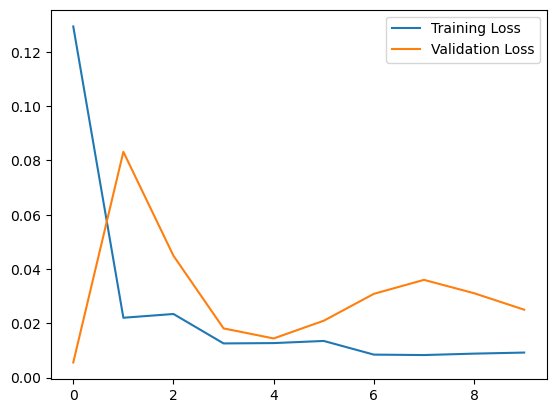

In [47]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train the model
def train_model(model, X_train, y_train, epochs=10, batch_size=32):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
    print("Model training completed.")
    return history

# Example usage
history = train_model(model, X_train, y_train, epochs=10, batch_size=32)

# Print training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [96]:
def construct_portfolio(predictions, tickers):
    # Ensure predictions is a 1-dimensional array
    predictions = predictions.flatten()
    
    # Get the indices of the top 50 predicted values
    top_indices = predictions.argsort()[-50:][::-1]  # Sort and take the top 50, then reverse to get the highest first
    
    # Construct the portfolio using the top indices
    portfolio = [tickers[i] for i in top_indices]
    print("Portfolio constructed successfully.")
    return portfolio

# Generate predictions
predictions = model.predict(X_test)

# Construct portfolio
portfolio = construct_portfolio(predictions, tickers[:len(predictions)])  # Use first 'len(predictions)' tickers
print("Top 10 stocks in the portfolio:", portfolio[:10])

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step
Portfolio constructed successfully.
Top 10 stocks in the portfolio: ['AAPL', 'MSFT', 'NVDA', 'GOOGL', 'GOOG', 'AMZN', 'META', 'BRK-B', 'LLY', 'AVGO']


In [98]:
def generate_report(portfolio, file_name='portfolio_report.xlsx'):
    workbook = xlsxwriter.Workbook(file_name)
    worksheet = workbook.add_worksheet()

    row = 0
    col = 0
    for stock in portfolio:
        worksheet.write(row, col, stock)
        row += 1

    workbook.close()
    print(f"Report generated successfully: {file_name}")

# Example usage
generate_report(portfolio)

Report generated successfully: portfolio_report.xlsx


In [100]:
import os

def generate_report(portfolio, file_name='portfolio_report.xlsx', output_dir='/Users/apple/Desktop/Data Science/'):
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Full path to the file
    file_path = os.path.join(output_dir, file_name)
    
    # Create the workbook and add a worksheet
    workbook = xlsxwriter.Workbook(file_path)
    worksheet = workbook.add_worksheet()

    # Write the portfolio to the worksheet
    row = 0
    col = 0
    for stock in portfolio:
        worksheet.write(row, col, stock)
        row += 1

    # Close the workbook
    workbook.close()
    print(f"Report generated successfully: {file_path}")
    return file_path

# Example usage
file_path = generate_report(portfolio)


Report generated successfully: /Users/apple/Desktop/Data Science/portfolio_report.xlsx


In [106]:
import pandas as pd
import numpy as np
import yfinance as yf
import xlsxwriter
import os

# Load S&P 500 ticker names
file_path = '/Users/apple/Desktop/Data Science/sp500_companies.csv'
tickers = pd.read_csv(file_path)['Symbol'].tolist()
print("Tickers loaded successfully.")

# Define functions
def fetch_current_prices(tickers):
    prices = {}
    for ticker in tickers:
        stock_data = yf.download(ticker, period='1d', interval='1d')
        if not stock_data.empty:
            current_price = stock_data['Close'].iloc[0]  # Use iloc to avoid FutureWarning
            prices[ticker] = current_price
        else:
            print(f"No data found for {ticker}")
    return prices

def calculate_shares_to_buy(current_prices, allocation_per_stock):
    shares_to_buy = {}
    for ticker, price in current_prices.items():
        shares = allocation_per_stock // price
        shares_to_buy[ticker] = shares
    return shares_to_buy

def generate_detailed_report(portfolio, current_prices, shares_to_buy, predictions, file_name='portfolio_report.xlsx', output_dir='/Users/apple/Desktop/Data Science/'):
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Full path to the file
    file_path = os.path.join(output_dir, file_name)
    
    # Create the workbook and add a worksheet
    workbook = xlsxwriter.Workbook(file_path)
    worksheet = workbook.add_worksheet()

    # Add headers
    headers = ['Ticker', 'Current Price', 'Shares to Buy', 'Prediction']
    for col, header in enumerate(headers):
        worksheet.write(0, col, header)

    # Write the data to the worksheet
    for row, ticker in enumerate(portfolio, start=1):
        worksheet.write(row, 0, ticker)
        worksheet.write(row, 1, current_prices.get(ticker, 'N/A'))
        worksheet.write(row, 2, shares_to_buy.get(ticker, 'N/A'))
        worksheet.write(row, 3, predictions.get(ticker, 'N/A'))

    # Close the workbook
    workbook.close()
    print(f"Detailed report generated successfully: {file_path}")
    return file_path

# Set the total investment amount
total_investment = 110000  # Updated to $110,000

# Load actual predictions
predictions_file_path = '/Users/apple/Desktop/Data Science/detailed_portfolio_report.csv'
predictions_df = pd.read_csv(predictions_file_path)

# Extract relevant columns
predictions = dict(zip(predictions_df['Ticker'], predictions_df['Prediction']))

# Filter portfolio to include only tickers present in the predictions file
portfolio = [ticker for ticker in tickers if ticker in predictions]
print(f"Filtered Portfolio: {portfolio}")

# Fetch current prices
current_prices = fetch_current_prices(portfolio)
print(current_prices)

# Calculate the allocation per stock
allocation_per_stock = total_investment / len(portfolio)

# Calculate shares to buy
shares_to_buy = calculate_shares_to_buy(current_prices, allocation_per_stock)
print(shares_to_buy)

# Generate the detailed report
file_path = generate_detailed_report(portfolio, current_prices, shares_to_buy, predictions)

Tickers loaded successfully.
Filtered Portfolio: ['GOOGL', 'GOOG', 'AMZN', 'ABBV', 'ADBE', 'AMD', 'ACN', 'ABT', 'AMGN', 'AXP', 'AMT', 'ADI', 'MO', 'AON', 'APH', 'MMM', 'APD', 'AFL', 'AEP', 'ALL', 'AIG', 'A', 'AMP', 'AME', 'AWK', 'ANSS', 'AEE', 'ARE', 'ALGN', 'LNT', 'AKAM', 'AES', 'AOS', 'ALLE', 'APA', 'ALB', 'AAL']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

{'GOOGL': 166.66000366210938, 'GOOG': 168.39999389648438, 'AMZN': 167.89999389648438, 'ABBV': 189.2899932861328, 'ADBE': 526.1699829101562, 'AMD': 132.5, 'ACN': 323.1499938964844, 'ABT': 111.30999755859375, 'AMGN': 333.989990234375, 'AXP': 232.27999877929688, 'AMT': 234.63999938964844, 'ADI': 207.9600067138672, 'MO': 51.06999969482422, 'AON': 330.2099914550781, 'APH': 59.130001068115234, 'MMM': 125.23999786376953, 'APD': 281.739990234375, 'AFL': 99.23999786376953, 'AEP': 101.79000091552734, 'ALL': 176.82000732421875, 'AIG': 71.97000122070312, 'A': 139.0399932861328, 'AMP': 402.6099853515625, 'AME': 152.74000549316406, 'AWK': 147.35000610351562, 'ANSS': 302.2200012207031, 'AEE': 82.52999877929688, 'ARE': 113.36000061035156, 'ALGN': 213.49000549316406, 'LNT': 57.11000061035156, 'AKAM': 94.55999755859375, 'AES': 17.1299991607666, 'AOS': 82.4000015258789, 'ALLE': 129.5399932861328, 'APA': 28.59000015258789, 'ALB': 86.98999786376953, 'AAL': 9.630000114440918}
{'GOOGL': 17.0, 'GOOG': 17.0, '